## Observations and Insights 

Of the 249 mice in the sample set, one mouse was determined to be a duplicate and was removed leaving 248 mice to be analyzed.

In reviewing the results of all drug regimens at all time points, Ramicane had the lowest overall average tumor mass along with the lowest median, variance, standard deviation and SEM.  Capomulin had the second lowest for all of these statistics.  

Capomulin and Ramicane had the highest number of measurement points at 230 and 228, respectively

The population of mice tested was almost evenly divided between males and females at 50.4% and 49.6%, respectively

Focusing on the final measurement points for the top performing drugs – Capomulin, Ramicane, Infubinol and Ceftamin, Capomulin’s lower quartile tumor volume was slightly higher (32.38 mm3) compared Ramicane (31.56 mm3) but was slightly lower at the upper quartile  - 40.16 mm3 vs. 40.66 mm3, respectively.  Capomulin’s results appear to be more consistent with an interquartile range of 7.78 mm3 compared to Ramicane at 7.10 mm3.  Infubinol and Ceftamin’s respective results were notably higher than Capomulin and Ramicane.  Infubinol had one outlier in its results.  

Selecting one mouse from the Capomulin data shows an initial increase in tumor mass followed by an overall reduction over time in the tumor volume.  It should be noted that this was not a statistical sample so this result alone cannot be relied upon as representative of the whole population.

When comparing the average tumor volume to the weight of each mouse, it appears that weight may be a factor in determining the volume of the tumors.  There is a very strong positive correlation between tumor volume and mouse weight.  


In [126]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
merge_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [127]:
# Checking the number of mice.
unique = len(merge_df["Mouse ID"].unique())
print(f"There are {unique} mice in the population.")



There are 249 mice in the population.


In [128]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_group = merge_df.groupby(['Mouse ID', 'Timepoint']).count()
sorted_dup = dup_group.sort_values('Drug Regimen', ascending = False)
sorted_dup.head(10)



Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     20                    2    2           2           2   
         15                    2    2           2           2   
         10                    2    2           2           2   
         5                     2    2           2           2   
         0                     2    2           2           2   
a203     0                     1    1           1           1   
q633     0                     1    1           1           1   
q610     20                    1    1           1           1   
         25                    1    1           1           1   
         30                    1    1           1           1   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     20                          2                 2  
         15                          2                 2  
         10                          2                 2  
         5                           2                 2  
         0                           2                 2  
a203     0                           1                 1  
q633     0                           1                 1  
q610     20                          1                 1  
         25                          1                 1  
         30                          1                 1

In [129]:
# Optional: Get all the data for the duplicate mouse ID. 
Dup_ID = merge_df.loc[(merge_df["Mouse ID"] == "g989")]
Dup_ID.head(10)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [130]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_df = merge_df.loc[(merge_df["Mouse ID"] not in "g989")]
merge_df.drop(merge_df.loc[merge_df['Mouse ID']=="g989"].index, inplace=True)
merge_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [131]:
# Checking the number of mice in the clean DataFrame.
unique = len(merge_df["Mouse ID"].unique())
print(f"There are {unique} mice in the population.")


There are 248 mice in the population.


In [132]:
#Verify that duplicates have been dropped
clean_group = merge_df.groupby(['Mouse ID', 'Timepoint']).count()
sorted_clean = clean_group.sort_values('Drug Regimen', ascending = False)
sorted_clean.head(10)

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
a203     0                     1    1           1           1   
q610     5                     1    1           1           1   
q633     25                    1    1           1           1   
         20                    1    1           1           1   
         15                    1    1           1           1   
         10                    1    1           1           1   
         5                     1    1           1           1   
         0                     1    1           1           1   
q610     35                    1    1           1           1   
         30                    1    1           1           1   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
a203     0                           1                 1  
q610     5                           1                 1  
q633     25                          1                 1  
         20                          1                 1  
         15                          1                 1  
         10                          1                 1  
         5                           1                 1  
         0                           1                 1  
q610     35                          1                 1  
         30                          1                 1

## Summary Statistics

In [133]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [134]:
stats_group = merge_df.groupby(['Drug Regimen'])
stats_mean = stats_group['Tumor Volume (mm3)'].mean()
stats_med = stats_group['Tumor Volume (mm3)'].median()
stats_var = stats_group['Tumor Volume (mm3)'].var()
stats_std = stats_group['Tumor Volume (mm3)'].std()
stats_sem = stats_group['Tumor Volume (mm3)'].sem()
summary_stats1 = pd.merge(stats_mean, stats_med, on="Drug Regimen", suffixes=("_mean", "_med"))
summary_stats2 = pd.merge(summary_stats1, stats_var, on="Drug Regimen")
summary_stats2 = summary_stats2.rename(columns={"Tumor Volume (mm3)_mean" : "Mean", "Tumor Volume (mm3)_med" : "Median", 
                                                "Tumor Volume (mm3)" : "Variance"})
summary_stats3 = pd.merge(summary_stats2, stats_std, on="Drug Regimen")
summary_stats = pd.merge(summary_stats3, stats_sem, on="Drug Regimen")
summary_stats = summary_stats.rename(columns={"Tumor Volume (mm3)_x" : "Std Deviation", "Tumor Volume (mm3)_y" : "SEM"})
                           
summary_stats

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [135]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

In [136]:
agg_stats_group = merge_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var','std','sem']})
#https://jamesrledoux.com/code/group-by-aggregate-pandas

agg_stats_group = agg_stats_group.rename(columns={"mean" : "Mean", "median" : "Median", 
                                                  "var" : "Variance", "std" : "Std Deviation", 
                                                  "sem" : "SEM" })
agg_stats_group
                                   

Tumor Volume (mm3)                                              
                           Mean     Median   Variance Std Deviation       SEM
Drug Regimen                                                                 
Capomulin             40.675741  41.557809  24.947764      4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177      6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684      6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577      8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479      8.134708  0.596466
Placebo               54.033581  52.288934  61.168083      7.821003  0.581331
Propriva              52.320930  50.446266  43.852013      6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704      4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562      7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355      6.966589  0.516398

## Bar and Pie Charts

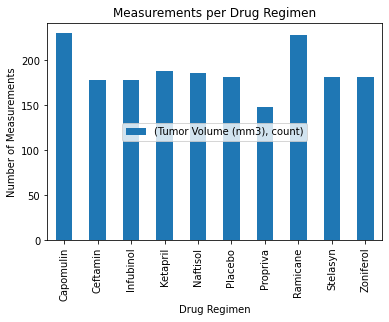

,Tumor Volume (mm3)
,count
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228


In [137]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
num_meas = merge_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['count']})
num_meas

meas_chart = num_meas.plot(kind='bar')
plt.title('Measurements per Drug Regimen')
plt.ylabel('Number of Measurements')
plt.legend(loc="center")
plt.show()
num_meas



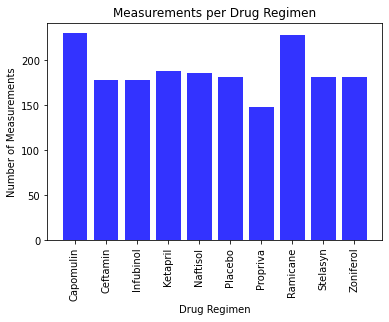

In [138]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#Create group by for data for chart
num_meas2 = merge_df.groupby('Drug Regimen').count() 

#Re-index so that we can use the index column to the x values on the chart
num_meas2 = num_meas2.reset_index(drop=False)
#num_meas2

#create x axis
x_axis = np.arange(len(num_meas2))
#x_axis
tick_location = [value for value in x_axis]

#create y axis
y_axis = num_meas2['Tumor Volume (mm3)']
plt.figure(figsize=(6,4))
#y_axis

#create bar chart
plt.bar(x_axis, y_axis, color= 'b', alpha=.8, align='center' )
plt.xticks(tick_location, num_meas2['Drug Regimen'], rotation='vertical')

#Format Bar Chart
plt.title('Measurements per Drug Regimen')
plt.ylabel('Number of Measurements')
plt.xlabel('Drug Regimen')
#Intentionally left Legend off since it really is not necessary
plt.show()







<function matplotlib.pyplot.show(*args, **kw)>

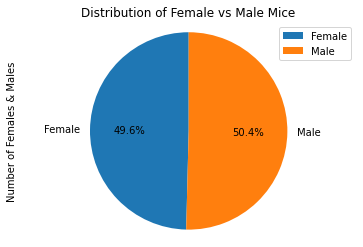

In [139]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Groupby mouse ID and Sex
MF_count = merge_df.groupby(['Mouse ID',"Sex"]).count() 

#Re-index so that we can do a second groupby on sex
MF_count = MF_count.reset_index(drop=False)
#MF_count.head()

#Groupby on Sex
MF_sum_count = MF_count.groupby("Sex").agg({'Mouse ID':['count']})
#MF_sum_count

#Create Pie Chart using pandas
MF_chart = MF_sum_count.plot(kind='pie', y="Mouse ID", title="Distribution of Female vs Male Mice", 
                             startangle=90, autopct='%1.1f%%')

#Format Pie Chart
plt.ylabel('Number of Females & Males')
#plt.legend(loc="left")
plt.axis('equal')

plt.show



C:\Users\ChrisR\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':


<function matplotlib.pyplot.show(*args, **kw)>

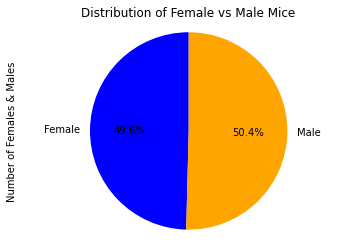

In [140]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

MF_sum_count1 = MF_sum_count.reset_index(drop=False)
#MF_sum_count1

#Create chart variables
labels = MF_sum_count1["Sex"]
sizes = MF_sum_count1["Mouse ID"]
colors = ["blue","orange"]

#Create Chart
plt.pie(sizes, labels=labels, colors = colors, autopct='%1.1f%%', startangle=90 )

#Format Pie Chart
plt.title("Distribution of Female vs Male Mice")
plt.ylabel('Number of Females & Males')
#intentionally left off legend.  Not necessary for this graph
plt.axis('equal')

plt.show




## Quartiles, Outliers and Boxplots

In [141]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time_group = merge_df.groupby('Mouse ID').max()        #.agg({'Timepoint':['max']})
max_time_group = max_time_group.rename(columns={"Timepoint" : "Max Timepoint"})
max_time_group = max_time_group["Max Timepoint"]
max_time_group

#Merge this group df with the original dataframe to get the tumor volume at the last timepoint
QOB_merge_df = pd.merge(merge_df, max_time_group, on="Mouse ID", how="left")
QOB_df = QOB_merge_df[QOB_merge_df["Timepoint"] == QOB_merge_df["Max Timepoint"]]

QOB_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45


In [142]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatments

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments: 
    cur_data = QOB_df[QOB_df["Drug Regimen"] == treatment]    
    #print(cur_data['Drug Regimen'])

    
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = cur_data["Tumor Volume (mm3)"].quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75] 
    iqr = upperq-lowerq
    
    print(f"\nFor the drug {treatment}")

    
    print(f"The tumor volume of lower quartile is: {lowerq}")
    print(f"The tumor volume upper quartile is: {upperq}")
    print(f"The tumor volume interquartile range is: {iqr}")
    print(f"The tumor volume median is: {quartiles[0.5]} ")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
 


For the drug Capomulin
The tumor volume of lower quartile is: 32.37735684
The tumor volume upper quartile is: 40.1592203
The tumor volume interquartile range is: 7.781863460000004
The tumor volume median is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

For the drug Ramicane
The tumor volume of lower quartile is: 31.56046955
The tumor volume upper quartile is: 40.65900627
The tumor volume interquartile range is: 9.098536719999998
The tumor volume median is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

For the drug Infubinol
The tumor volume of lower quartile is: 54.04860769
The tumor volume upper quartile is: 65.52574285
The tumor volume interquartile range is: 11.477135160000003
The tumor volume median is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

For the drug Ceftamin
The tumor vol

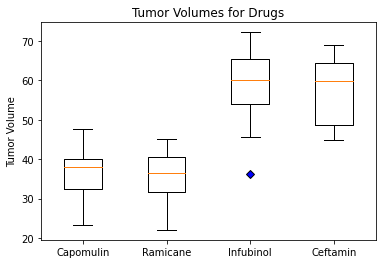

In [143]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
blue_diamond = dict(markerfacecolor='b', marker='D')
ax1.set_title(f"Tumor Volumes for Drugs")
ax1.set_ylabel('Tumor Volume')


ax1.boxplot(
    [QOB_df[QOB_df["Drug Regimen"] == treatment]['Tumor Volume (mm3)'] for treatment in treatments], 
    labels = treatments,
    flierprops=blue_diamond)

plt.show()


## Line and Scatter Plots

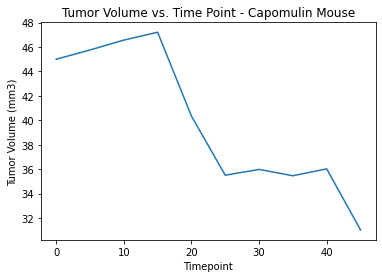

In [144]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = merge_df.loc[(merge_df["Mouse ID"] == "u364")]
line_df

#line_df = line_df.loc[line_df['Tumor Volume (mm3)'] !='?']
#line_df.head()

y_axis = line_df['Tumor Volume (mm3)']
y_axis

x_axis = line_df['Timepoint']
x_axis

plt.plot(x_axis, y_axis)

#Format Bar Chart
plt.title('Tumor Volume vs. Time Point - Capomulin Mouse')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')

plt.show()
                   


C:\Users\ChrisR\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


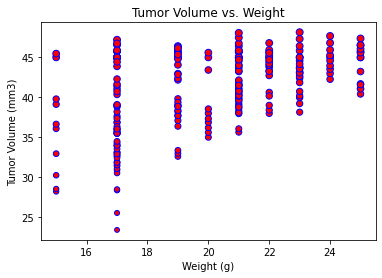

In [145]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = merge_df.loc[(merge_df["Drug Regimen"] == "Capomulin")]
line_df

line_df = line_df.loc[line_df['Tumor Volume (mm3)'] !='?']
line_df.head()

y_axis = line_df['Tumor Volume (mm3)']
y_axis

x_axis = line_df['Weight (g)']
x_axis

plt.scatter(x_axis, y_axis, marker='o', facecolors='red', edgecolors="blue", s=y_axis)

#Format Bar Chart
plt.title('Tumor Volume vs. Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')

plt.show()
                 



## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84
The r_squared is: 0.7088568047708721


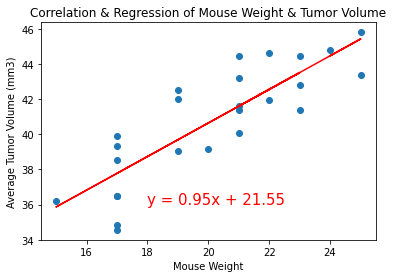

In [146]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

qob_df = QOB_merge_df[QOB_merge_df["Timepoint"] == QOB_merge_df["Max Timepoint"]]

# Start by getting the last (greatest) timepoint for each mouse
avg_tum_vol = merge_df.groupby('Mouse ID').mean()        #.agg({'Timepoint':['max']})
avg_tum_vol = avg_tum_vol.rename(columns={"Tumor Volume (mm3)" : "Avg Tumor Volume"})
avg_tum_vol = avg_tum_vol["Avg Tumor Volume"]
avg_tum_vol

#Merge this group df with the original dataframe to get the tumor volume at the last timepoint
qob_df = pd.merge(qob_df, avg_tum_vol, on="Mouse ID", how="left")
qob_df.head(20)

cor_df = qob_df.loc[(qob_df["Drug Regimen"] == "Capomulin")]
cor_df

weight = cor_df["Weight (g)"]
#weight

tumor = cor_df['Avg Tumor Volume']

correlation = st.pearsonr(weight, tumor)

x_values = weight
y_values = tumor
(slope, intercept, rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot (x_values,regress_values,"r-")

#Format Bar Chart
plt.annotate(line_eq,(18,36), fontsize=15, color = "red")
plt.title('Correlation & Regression of Mouse Weight & Tumor Volume')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Mouse Weight')

print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")
print(f"The r_squared is: {rvalue**2}")

plt.show()





